<a href="https://colab.research.google.com/github/UmarNauruzov/model_binance_forecasting/blob/main/%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D1%82%D0%B0%D0%B6%D0%B5%D1%80_%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import keras
from sklearn.feature_selection import f_regression
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tqdm import trange

In [ ]:
import requests
import csv
from datetime import datetime, timedelta

# Указываем параметры запроса
symbols = ["BTCUSDT"]
interval = "1h"

# Вычисляем даты начала и конца интервала (30 дней)
end_time = int(datetime.now().timestamp() * 1000)
start_time = int((datetime.now() - timedelta(days=30)).timestamp() * 1000)

# Отправляем GET-запросы и получаем данные в формате JSON
data = {}
for symbol in symbols:
    url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&startTime={start_time}&endTime={end_time}"
    response = requests.get(url).json()
    print(response)
    data[symbol] = response

start_date = datetime.utcfromtimestamp(start_time/1000).strftime('%Y-%m-%d')
end_date = datetime.utcfromtimestamp(end_time/1000).strftime('%Y-%m-%d')

with open(f'binance_{symbol}_trades_{start_date}_to_{end_date}.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Записываем заголовок CSV-файла
    writer.writerow(['Symbol', 'Open time', 'Open', 'High', 'Low', 'Close', 'Объем', 'Время закрытия', 'Объем квотируемой валюты', 'Кол-во сделок', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
    #Записываем данные в CSV-файл
    for symbol, rows in data.items():
        for row in rows:
            writer.writerow([symbol] + row)

print(f'Данные успешно сохранены в файл binance_{symbol}_trades_{start_date}_to_{end_date}.csv')

In [75]:
df = pd.read_csv("/content/binance_BTCUSDT_trades_2023-03-09_to_2023-04-08.csv")
df

,Symbol,Open time,Open,High,Low,Close,Объем,Время закрытия,Объем квотируемой валюты,Кол-во сделок,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,BTCUSDT,1678356000000,21641.07,21683.68,21527.00,21648.43,14926.28036,1678359599999,3.228502e+08,329623,7456.60487,1.612927e+08,0
1,BTCUSDT,1678359600000,21646.98,21674.11,21620.00,21669.38,9697.99101,1678363199999,2.099377e+08,255985,4833.78765,1.046419e+08,0
2,BTCUSDT,1678363200000,21669.38,21674.98,21600.96,21611.34,9381.03199,1678366799999,2.029277e+08,279134,4606.56068,9.964947e+07,0
3,BTCUSDT,1678366800000,21611.89,21730.77,21552.84,21703.76,21493.94100,1678370399999,4.652056e+08,502630,11100.52664,2.402705e+08,0
4,BTCUSDT,1678370400000,21703.76,21834.99,21686.72,21722.89,23399.51181,1678373999999,5.089634e+08,548851,11801.96877,2.567112e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,BTCUSDT,1680141600000,28350.00,29184.68,28343.39,28964.76,12850.87620,1680145199999,3.714048e+08,224546,7113.53919,2.054637e+08,0
496,BTCUSDT,1680145200000,28964.76,29002.67,28090.06,28489.18,12075.03577,1680148799999,3.438939e+08,192757,5929.10104,1.688418e+08,0
497,BTCUSDT,1680148800000,28489.19,28701.96,28442.79,28587.64,3571.44760,1680152399999,1.021061e+08,64768,1869.64915,5.345488e+07,0
498,BTCUSDT,1680152400000,28587.63,28633.70,28491.39,28613.98,2288.37147,1680155999999,6.535762e+07,51314,1180.01093,3.370695e+07,0


In [76]:
# выбираем нужные столбцы
df = df.loc[:, ['Open time', 'High', 'Low','Close']]
df

,Open time,High,Low,Close
0,1678356000000,21683.68,21527.00,21648.43
1,1678359600000,21674.11,21620.00,21669.38
2,1678363200000,21674.98,21600.96,21611.34
3,1678366800000,21730.77,21552.84,21703.76
4,1678370400000,21834.99,21686.72,21722.89
...,...,...,...,...
495,1680141600000,29184.68,28343.39,28964.76
496,1680145200000,29002.67,28090.06,28489.18
497,1680148800000,28701.96,28442.79,28587.64
498,1680152400000,28633.70,28491.39,28613.98


In [78]:
scaler = MinMaxScaler(feature_range=(0, 1))

<function matplotlib.pyplot.show(close=None, block=None)>

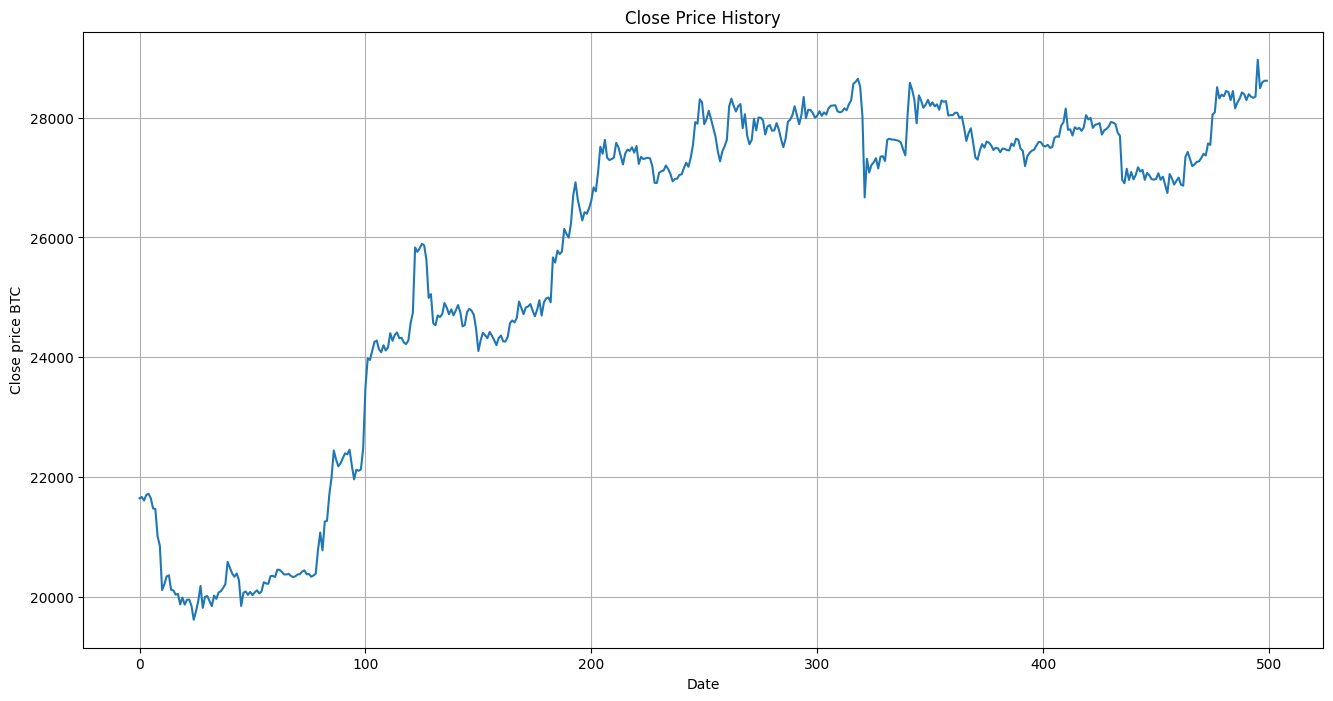

In [79]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close price BTC')
plt.grid()
plt.show

In [80]:
x_dataset = scaler.fit_transform(df)
x_dataset

array([[0.        , 0.20052779, 0.21933933, 0.21692693],
       [0.002     , 0.1995078 , 0.22965252, 0.21916923],
       [0.004     , 0.19960053, 0.22754109, 0.21295716],
       ...,
       [0.996     , 0.9485507 , 0.98626239, 0.95963652],
       [0.998     , 0.9412754 , 0.99165186, 0.96245572],
       [1.        , 0.9456442 , 1.        , 0.96244501]])

In [81]:
y_dataset = x_dataset[0:,3]
y_dataset

array([0.21692693, 0.21916923, 0.21295716, 0.22284895, 0.22489645,
       0.21694191, 0.19877664, 0.19777162, 0.14890454, 0.13199795,
       0.05298027, 0.06335692, 0.07726772, 0.07926277, 0.05336666,
       0.05237555, 0.04482238, 0.04606715, 0.02729608, 0.03943445,
       0.02695037, 0.03552568, 0.03611863, 0.02477336, 0.        ,
       0.01489013, 0.03351029, 0.0602862 , 0.02120709, 0.04102493,
       0.04224508, 0.03305327, 0.02428102, 0.04309704, 0.03720928,
       0.0486969 , 0.05090066, 0.05662253, 0.06361593, 0.10329441,
       0.09319926, 0.08265137, 0.07685244, 0.08238486, 0.07095611,
       0.02452612, 0.04818101, 0.05042438, 0.04442744, 0.0497062 ,
       0.04388158, 0.04886708, 0.05251683, 0.04712783, 0.05024564,
       0.06692211, 0.06476009, 0.06414359, 0.07789064, 0.07837335,
       0.0761942 , 0.08927123, 0.08902292, 0.0853753 , 0.08086609,
       0.08078689, 0.08191393, 0.07845576, 0.07600689, 0.07760272,
       0.08083184, 0.08139911, 0.08608171, 0.08816881, 0.08129

In [82]:
x_train = []
y_train = []

for i in trange(0, round(y_dataset.shape[0]*0.8)):
    x_train.append(x_dataset[i])
    y_train.append(y_dataset[i+1])
    
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train

100%|██████████| 400/400 [00:00<00:00, 458143.53it/s]


array([0.21916923, 0.21295716, 0.22284895, 0.22489645, 0.21694191,
       0.19877664, 0.19777162, 0.14890454, 0.13199795, 0.05298027,
       0.06335692, 0.07726772, 0.07926277, 0.05336666, 0.05237555,
       0.04482238, 0.04606715, 0.02729608, 0.03943445, 0.02695037,
       0.03552568, 0.03611863, 0.02477336, 0.        , 0.01489013,
       0.03351029, 0.0602862 , 0.02120709, 0.04102493, 0.04224508,
       0.03305327, 0.02428102, 0.04309704, 0.03720928, 0.0486969 ,
       0.05090066, 0.05662253, 0.06361593, 0.10329441, 0.09319926,
       0.08265137, 0.07685244, 0.08238486, 0.07095611, 0.02452612,
       0.04818101, 0.05042438, 0.04442744, 0.0497062 , 0.04388158,
       0.04886708, 0.05251683, 0.04712783, 0.05024564, 0.06692211,
       0.06476009, 0.06414359, 0.07789064, 0.07837335, 0.0761942 ,
       0.08927123, 0.08902292, 0.0853753 , 0.08086609, 0.08078689,
       0.08191393, 0.07845576, 0.07600689, 0.07760272, 0.08083184,
       0.08139911, 0.08608171, 0.08816881, 0.08129957, 0.08158

In [84]:
test_data = df[round(y_dataset.shape[0]*0.8):]
x_test = []
y_test = y_dataset[round(y_dataset.shape[0]*0.8)+1:]
for i in trange(round(y_dataset.shape[0]*0.8), round(y_dataset.shape[0])):
  x_test.append(x_dataset[i])
x_test = np.array(x_test)
y_test

100%|██████████| 100/100 [00:00<00:00, 178405.10it/s]


array([0.84500326, 0.84802153, 0.84287014, 0.84375421, 0.86026479,
       0.86321135, 0.8623444 , 0.88239342, 0.88815061, 0.91279447,
       0.87482313, 0.87575109, 0.86455459, 0.87938265, 0.87627233,
       0.87832625, 0.87294046, 0.87941368, 0.90105318, 0.89332127,
       0.89612869, 0.87822243, 0.8838073 , 0.88482624, 0.8867849 ,
       0.86625638, 0.87382025, 0.87627768, 0.88052895, 0.88878103,
       0.88768503, 0.88525543, 0.86998213, 0.86388137, 0.78546949,
       0.77939442, 0.80528304, 0.78542882, 0.79942953, 0.78638567,
       0.79440229, 0.80797273, 0.80041207, 0.80307928, 0.78552729,
       0.79771703, 0.79373227, 0.78668215, 0.78592116, 0.78699468,
       0.79725787, 0.78573707, 0.79117424, 0.77633441, 0.76198478,
       0.79584934, 0.78789267, 0.7770772 , 0.78361036, 0.78956342,
       0.7770879 , 0.77506823, 0.82654258, 0.83530413, 0.82258993,
       0.81010371, 0.81308452, 0.8176526 , 0.81847246, 0.82457857,
       0.83198724, 0.82903854, 0.85051107, 0.84794982, 0.90233

In [85]:
model = Sequential()
model.add(LSTM(x_train.shape[1], return_sequences=True, input_shape=[x_train.shape[1], 1]))
model.add(LSTM(x_train.shape[1], return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 1, epochs=50)
model.evaluate(x_test[0:-1], y_test)
print(model.summary())

Epoch 1/50
400/400 [==============================] - 21s 5ms/step - loss: 0.1753
Epoch 2/50
400/400 [==============================] - 2s 5ms/step - loss: 0.0091
Epoch 3/50
400/400 [==============================] - 2s 5ms/step - loss: 0.0027
Epoch 4/50
400/400 [==============================] - 2s 6ms/step - loss: 0.0019
Epoch 5/50
400/400 [==============================] - 2s 6ms/step - loss: 0.0017
Epoch 6/50
400/400 [==============================] - 2s 6ms/step - loss: 0.0016
Epoch 7/50
400/400 [==============================] - 2s 5ms/step - loss: 0.0016
Epoch 8/50
400/400 [==============================] - 2s 5ms/step - loss: 0.0015
Epoch 9/50
400/400 [==============================] - 2s 5ms/step - loss: 0.0015
Epoch 10/50
400/400 [==============================] - 3s 7ms/step - loss: 0.0015
Epoch 11/50
400/400 [==============================] - 2s 5ms/step - loss: 0.0014
Epoch 12/50
400/400 [==============================] - 2s 5ms/step - loss: 0.0014
Epoch 13/50
400/400 [===

4/4 [==============================] - 1s 7ms/step


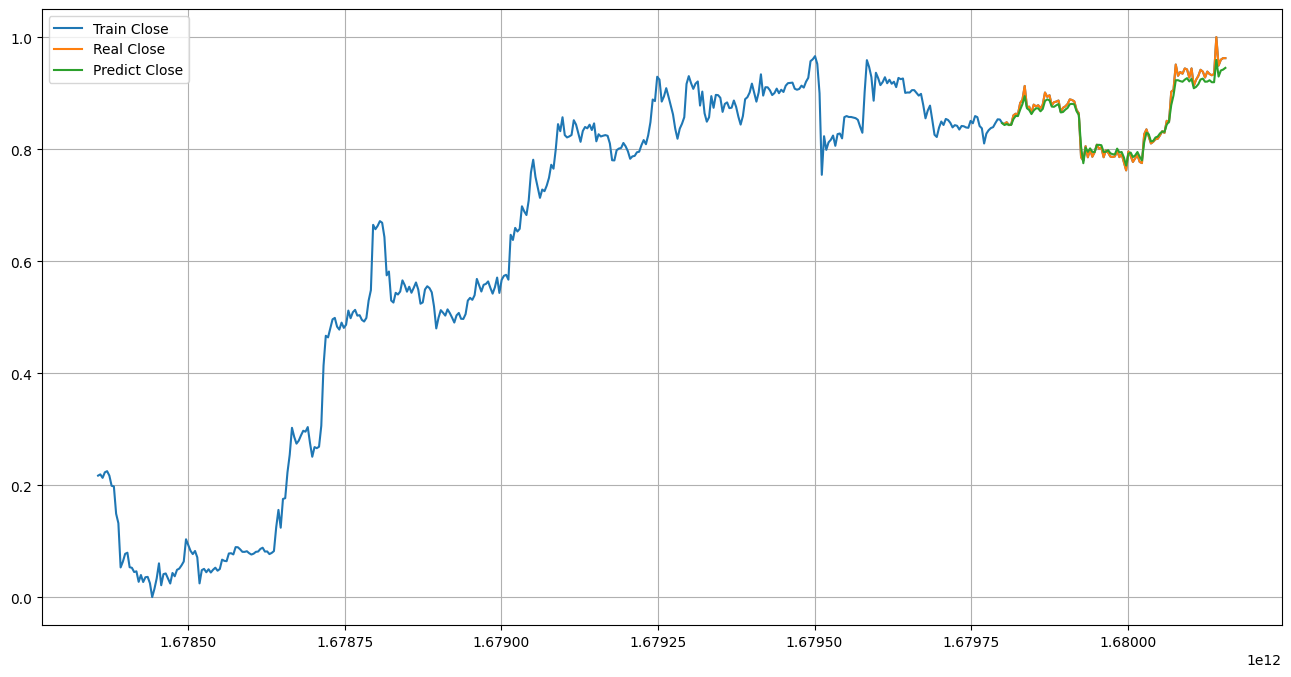

In [86]:
y_pred = model.predict(x_test) 
fig, ax = plt.subplots(1, figsize = (16,8))
ax.plot(df['Open time'],y_dataset)
ax.plot(df['Open time'][y_train.shape[0]+1:], y_test)
ax.plot(df['Open time'][y_train.shape[0]:], y_pred)
plt.legend(['Train Close', 'Real Close', 'Predict Close'])
plt.grid()

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(x_test[0:-1]) 
# расчёт MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE модели равно:{mse}')
# расчёт MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MSA модели равно:{mae}')

4/4 [==============================] - 0s 4ms/step
MSE модели равно:0.00039867255059226176
MSA модели равно:0.014183802951886653


4/4 [==============================] - 0s 4ms/step


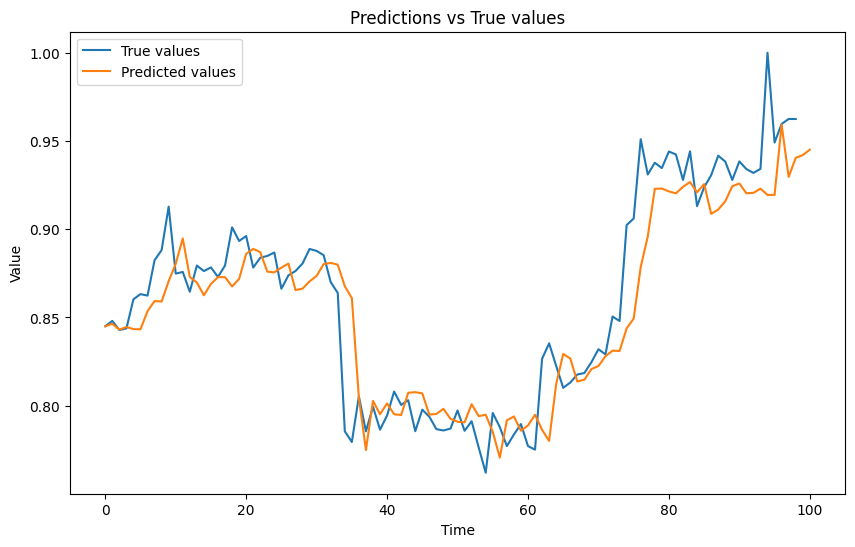

In [88]:
# Получение предсказаний модели на тестовой выборке
y_pred = model.predict(x_test)

# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values')
plt.plot(np.concatenate([y_test[:1].reshape(-1, 1), y_pred]), label='Predicted values')
plt.title('Predictions vs True values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()